In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas matplotlib scikit-learn

In [ ]:
import pandas as pd

# Specify the file path to the uploaded dataset
file_path = '/content/drive/MyDrive/AI PROJECT/train_collisions_india.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head()  # Display the first few rows of the dataset

,Year,Month,Day,Location,Casualties,Cause,Weather,Train Speed,Maintenance Status,Signal Error
0,1998,1,27,844,31,Technical Fault,Clear,88.291400,1,1
1,1961,6,23,387,40,Human Error,Clear,46.087071,0,0
2,2018,2,7,506,22,Weather Conditions,Rainy,30.153011,0,1
3,2007,7,15,294,31,Human Error,Stormy,72.348643,0,1
4,1967,9,14,193,28,Technical Fault,Clear,64.646958,0,0


In [ ]:
# Check for any missing values in the dataset
print(df.isnull().sum())

# Get an overview of the dataset
print(df.describe())

# Get a quick view of column types
print(df.info())

Year                  0
Month                 0
Day                   0
Location              0
Casualties            0
Cause                 0
Weather               0
Train Speed           0
Maintenance Status    0
Signal Error          0
dtype: int64
                Year         Month            Day      Location  \
count  100000.000000  100000.00000  100000.000000  100000.00000   
mean     1984.807970       6.48890      15.941710     501.93577   
std        22.217015       3.46145       8.939223     288.31011   
min      1947.000000       1.00000       1.000000       1.00000   
25%      1966.000000       3.00000       8.000000     253.00000   
50%      1985.000000       6.00000      16.000000     503.00000   
75%      2004.000000      10.00000      24.000000     751.00000   
max      2023.000000      12.00000      31.000000    1000.00000   

          Casualties    Train Speed  Maintenance Status   Signal Error  
count  100000.000000  100000.000000       100000.000000  100000.000000

<ipython-input-6-ebf25f03d702>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette="Blues_d")


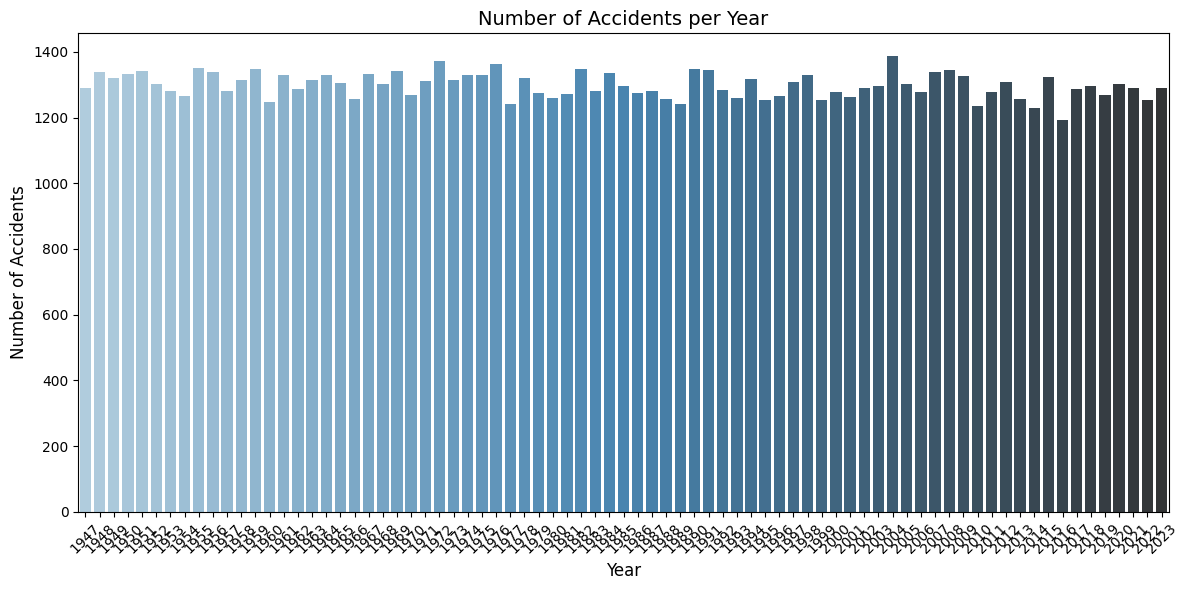

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of accidents over the years with rotated labels
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette="Blues_d")
plt.title('Number of Accidents per Year', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()


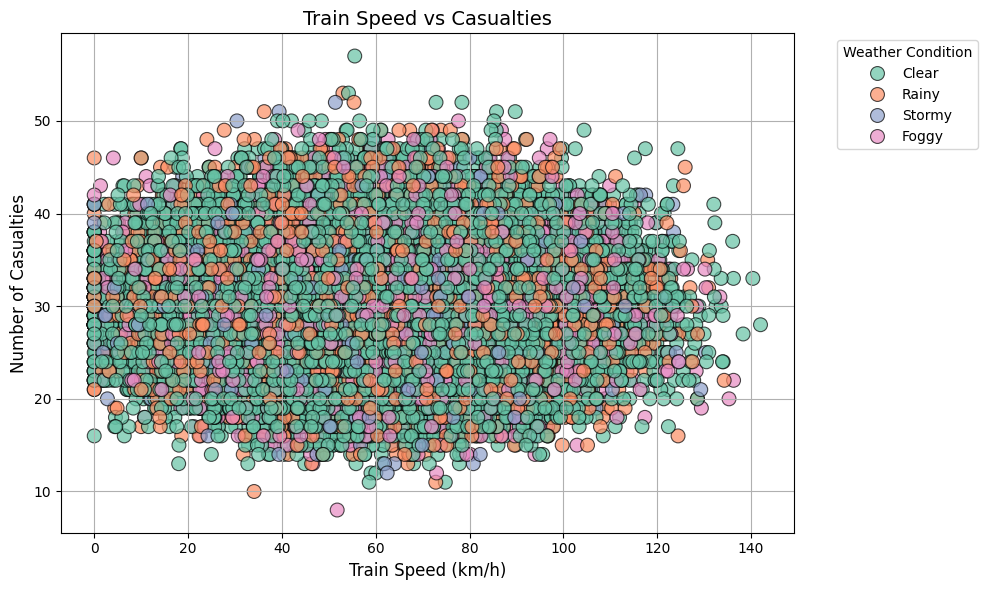

In [ ]:
# Plot the relationship between Train Speed and Casualties with better aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Train Speed', y='Casualties', data=df, hue='Weather',
                palette="Set2", s=100, alpha=0.7, edgecolor='black')

plt.title('Train Speed vs Casualties', fontsize=14)
plt.xlabel('Train Speed (km/h)', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# Drop rows with missing values (or use imputation if needed)
df_clean = df.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns like WEATHER, LOCATION, CAUSE, etc.
label_encoder = LabelEncoder()
df_clean['Weather'] = label_encoder.fit_transform(df_clean['Weather'])
df_clean['Location'] = label_encoder.fit_transform(df_clean['Location'])
df_clean['Cause'] = label_encoder.fit_transform(df_clean['Cause'])
df_clean['Maintenance Status'] = label_encoder.fit_transform(df_clean['Maintenance Status'])

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (independent variables) and the target (dependent variable)
X = df_clean[['Year', 'Month', 'Day', 'Weather', 'Train Speed', 'Maintenance Status', 'Signal Error']]
y = df_clean['Casualties']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

#evaluation
# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Calculate R-squared value
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 28.74604416
R-squared (Random Forest): -0.067025746323919


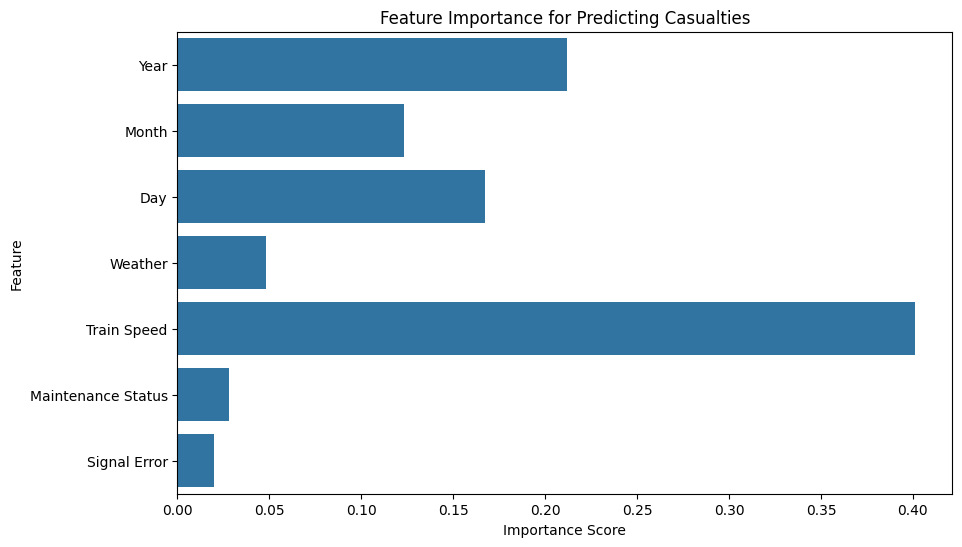

In [ ]:
# Get feature importance from the model
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Predicting Casualties')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Use the best estimator
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the saved model (for later use)
loaded_model = joblib.load('random_forest_model.pkl')